# Importing Libraries

In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=728b5377984b9fdbaa3fe76077b0b8e8597172f0766438d3a5f2d1da3df4e9ea
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
import torch
from word2number import w2n
import torch.nn as nn
import pandas as pd
from transformers import BertTokenizer, BertModel
import spacy
import pandas as pd
import warnings
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,ELU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.optimizers import Adam
import torch
import joblib
import matplotlib.pyplot as plt
import re

# Importing nltk for removing stopwords, word_tokenize and WordNetLemmatizer

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Importing Fiqatask1 dataset

In [ ]:
df = pd.read_csv('/content/fiqatask1.csv')

In [ ]:
df

,No,sentence,info__snippets,info__target,info_sentiment_score,info_aspects
0,1.0,Royal Mail chairman Donald Brydon set to step ...,['set to step down'],Royal Mail,-0.374,['Corporate/Appointment']
1,7.0,Stakes High for AstraZeneca Heart Drug Facing ...,['Facing Tough Competition'],AstraZeneca,-0.240,['Corporate/Risks']
2,8.0,UPDATE 1-Dairy Crest loses a third of Morrison...,['Crest loses a third of Morrisons milk contra...,Morrisons,-0.161,['Corporate/Sales/Failed Contract Discussion']
3,22.0,Insight hires Aviva's David Hillier for multi-...,['hires Aviva's David Hillier for multi-asset ...,Insight,0.137,['Corporate/Appointment/Executive Appointment']
4,30.0,Primark racks up a happy Christmas after stron...,['after strong sales'],Primark,0.704,['Corporate/Sales']
...,...,...,...,...,...,...
493,1750.0,"Aviva, M&G suspend property funds as investors...",['M&G suspend property funds as investors panic'],M&G,-0.807,['Corporate/Risks']
494,1754.0,"UK housing market steadies after Brexit dip, P...",['housing market'],Perssimon,0.339,['Market/Market']
495,1755.0,BRIEF-Aviva aims to increase dividend pay-out ...,['increase dividend pay-out'],Aviva,0.439,['Corporate/Dividend Policy']
496,1764.0,Builder Persimmon hails 6% rise in house sales,['6% rise in house sales'],Persimmon,0.435,['Corporate/Sales']


# info_sentiment_score

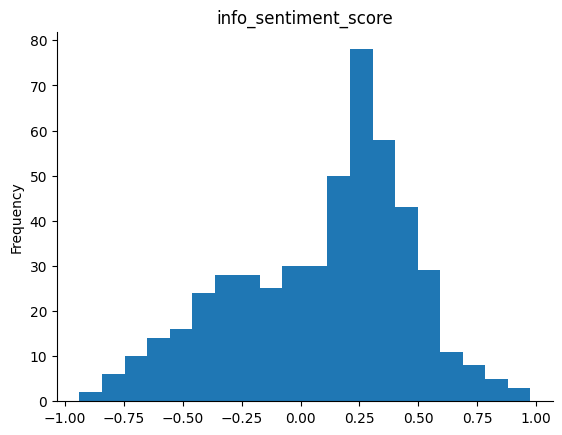

In [ ]:
from matplotlib import pyplot as plt
df['info_sentiment_score'].plot(kind='hist', bins=20, title='info_sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.columns

Index(['No', 'sentence', 'info__snippets', 'info__target',
       'info_sentiment_score', 'info_aspects'],
      dtype='object')

#Data Preprocessing : Convert to lowercase,  Remove punctuation, Tokenizing text, Removal of stopwords, Applying lemmatization

In [ ]:
nlp = spacy.load('en_core_web_sm')
def preprocess_text(text):
    if(not isinstance(text, str)):
        text = str(text)
    text = text.lower()
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.like_num:
            tokens.append(token.text)
        elif not token.is_stop and not token.is_punct:
            tokens.append(token.lemma_)
    return ' '.join(tokens)
df['preprocessed_sentence'] = df['sentence'].apply(preprocess_text)
print(df[['sentence', 'preprocessed_sentence']])

                                              sentence  \
0    Royal Mail chairman Donald Brydon set to step ...   
1    Stakes High for AstraZeneca Heart Drug Facing ...   
2    UPDATE 1-Dairy Crest loses a third of Morrison...   
3    Insight hires Aviva's David Hillier for multi-...   
4    Primark racks up a happy Christmas after stron...   
..                                                 ...   
493  Aviva, M&G suspend property funds as investors...   
494  UK housing market steadies after Brexit dip, P...   
495  BRIEF-Aviva aims to increase dividend pay-out ...   
496     Builder Persimmon hails 6% rise in house sales   
497  EasyJet attracts more passengers in June but s...   

                                 preprocessed_sentence  
0           royal mail chairman donald brydon set step  
1    stake high astrazeneca heart drug face tough c...  
2    update 1 dairy crest lose third morrison milk ...  
3    insight hire aviva david hillier multi asset team  
4             prim

In [ ]:
df['preprocessed_sentence']

,preprocessed_sentence
0,royal mail chairman donald brydon set step
1,stake high astrazeneca heart drug face tough c...
2,update 1 dairy crest lose third morrison milk ...
3,insight hire aviva david hillier multi asset team
4,primark rack happy christmas strong sale
...,...
493,aviva m&g suspend property fund investor panic
494,uk housing market steady brexit dip persimmon say
495,brief aviva aim increase dividend pay ratio 50...
496,builder persimmon hail 6 rise house sale


#Loading BERT(pre-trained model and tokenizer) and SPACY for syntactic analysis

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',clean_up_tokenization_spaces=True)
bert_model = BertModel.from_pretrained('bert-base-uncased')

nlp = spacy.load('en_core_web_sm')

warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# BERT embeddings

In [ ]:
def get_bert_embeddings(sentences, tokenizer, model):
    sentences = [s for s in sentences if isinstance(s, str)]
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=50)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]
    return cls_embeddings

In [ ]:
sentences = df['preprocessed_sentence'].tolist()

sentences = [str(s) for s in sentences]

bert_embeddings = get_bert_embeddings(sentences, tokenizer, bert_model)
print(f"BERT Embeddings Shape: {bert_embeddings.shape}")
print(bert_embeddings)

BERT Embeddings Shape: torch.Size([498, 768])
tensor([[-0.1573,  0.1368,  0.1011,  ..., -0.1020,  0.0516,  0.1758],
        [-0.6635,  0.0580,  0.0088,  ..., -0.2303,  0.5818,  0.1199],
        [-0.2898, -0.1630, -0.2003,  ..., -0.1376, -0.0443,  0.4348],
        ...,
        [-0.3253, -0.0235,  0.2436,  ...,  0.0631,  0.3182,  0.4077],
        [-0.1589,  0.1944,  0.1013,  ..., -0.2016,  0.0854,  0.1301],
        [-0.2950, -0.0129,  0.2963,  ..., -0.1853,  0.3825,  0.0023]])


# Digit CNN class implementation

In [ ]:
class DigitCNN(nn.Module):
    def __init__(self):
        super(DigitCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool1d(5)
        self.fc = nn.Linear(16 * 5, 3)
        self.out_features = self.fc.out_features

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        if x.shape[-1] >= 2:
            x = self.pool(x)
        if x.shape[-1] < 5:
            padding_needed = 5 - x.shape[-1]
            x = torch.nn.functional.pad(x, (0, padding_needed))
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

digit_cnn = DigitCNN()

# Dependeny tree for numerical values like monetory,percentage and temporary

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_numerical_info(preprocessed_sentence):
    doc = nlp(preprocessed_sentence)
    numerical_info = []

    for token in doc:
        if token.like_num or token.is_digit or token.pos_ == "ORDINAL":
            num_type = None
            aspect = None

            if token.dep_ == "nummod":
                if token.head.text in ["%", "percentage", "percent"]:
                    num_type = "percentage"
                else:
                    num_type = "cardinal"
                aspect = token.head.text

            elif token.dep_ in ["pobj", "dobj"]:
                if token.head.text in ["after", "before", "during", "since", "for", "in"]:
                    num_type = "temporal"
                aspect = token.head.text

            # Modified amod handling
            elif token.dep_ == "amod":
                if token.pos_ == "ORDINAL":
                    num_type = "ordinal"
                    aspect = token.head.text
                elif token.head.ent_type_ in ["MONEY", "PERCENT", "DATE", "TIME"]:
                    num_type = token.head.ent_type_.lower()
                    aspect = token.head.text

                elif (token.is_digit or token.like_num) and num_type is None:
                    num_type = "cardinal"
                    aspect = token.head.text

            if num_type is None:
                if token.text.startswith("-"):
                    num_type = "negative"
                    aspect = "negative value"
                elif token.is_digit and num_type is None:
                    num_type = "cardinal"
                    aspect = token.head.text

            dep_type = token.dep_ if token.dep_ in ["nummod", "amod"] else None

            if num_type is not None:
                numerical_info.append({
                    "value": token.text,
                    "type": num_type,
                    "aspect": aspect,
                    "dependency_type": dep_type,
                })

    return numerical_info

In [ ]:
df["numerical_info"] = df["preprocessed_sentence"].apply(extract_numerical_info)
print(df['numerical_info'][0])
print(df['numerical_info'][2])

[]
[{'value': '1', 'type': 'cardinal', 'aspect': 'crest', 'dependency_type': 'nummod'}, {'value': 'third', 'type': 'cardinal', 'aspect': 'contract', 'dependency_type': 'amod'}]


In [ ]:
print(df['numerical_info'])

0                                                     []
1                                                     []
2      [{'value': '1', 'type': 'cardinal', 'aspect': ...
3                                                     []
4                                                     []
                             ...                        
493                                                   []
494                                                   []
495    [{'value': '50', 'type': 'cardinal', 'aspect':...
496    [{'value': '6', 'type': 'cardinal', 'aspect': ...
497                                                   []
Name: numerical_info, Length: 498, dtype: object


# Encode numerical values using Digit CNN

In [ ]:
def encode_numerical_values(numerical_info):
    encoded_values = []
    has_numerical_values = False

    for num_info in numerical_info:
        try:
            num_str = num_info['value']
            num_type = num_info['type']

            if num_type == 'ordinal' or num_type == 'cardinal':
                try:

                    if num_str.isdigit() or num_str.replace('.', '', 1).isdigit():
                        num = float(num_str)
                    else:

                        num = w2n.word_to_num(num_str.lower())
                except ValueError:
                    num = 0

            else:
                continue

            tensor = torch.tensor([[num]], dtype=torch.float32).unsqueeze(0)
            encoded_output = digit_cnn(tensor)

            encoded_values.append(encoded_output.view(1, -1))
            has_numerical_values = True

        except ValueError:
            print(f"ValueError encountered for input: {num_info}")
            continue

    if not has_numerical_values:
        return torch.zeros(1, 3)

    return torch.cat(encoded_values, dim=1)

In [ ]:
df['encoded_values'] = df['numerical_info'].apply(encode_numerical_values)
print(df['encoded_values'][0])
print(df['encoded_values'][1])
print(df['encoded_values'][2])

tensor([[0., 0., 0.]])
tensor([[0., 0., 0.]])
tensor([[ 0.0584, -0.0858, -0.0869,  0.0923, -0.1185, -0.1205]],
       grad_fn=<CatBackward0>)


In [ ]:
print(df['encoded_values'])

0                 [[tensor(0.), tensor(0.), tensor(0.)]]
1                 [[tensor(0.), tensor(0.), tensor(0.)]]
2      [[tensor(0.0584, grad_fn=<UnbindBackward0>), t...
3                 [[tensor(0.), tensor(0.), tensor(0.)]]
4                 [[tensor(0.), tensor(0.), tensor(0.)]]
                             ...                        
493               [[tensor(0.), tensor(0.), tensor(0.)]]
494               [[tensor(0.), tensor(0.), tensor(0.)]]
495    [[tensor(-1.7565, grad_fn=<UnbindBackward0>), ...
496    [[tensor(-0.1363, grad_fn=<UnbindBackward0>), ...
497               [[tensor(0.), tensor(0.), tensor(0.)]]
Name: encoded_values, Length: 498, dtype: object


### Printing sentiment scores of each sentences and modifying df inserting sentiment scores :

In [ ]:
sentiment_scores_list = []
print("\nSentiment Scores for Each Sentence:")
for idx, row in df.iterrows():
    if row['encoded_values'].numel() == 0:
        print(f"Sentence: {row['sentence']}, No numerical values found.")
        continue
    sentiment_scores = row['encoded_values'].detach().numpy()
    print(f"Sentence: {row['preprocessed_sentence']}, Sentiment Scores: {sentiment_scores}")
    sentiment_scores_list.append(sentiment_scores)
df['sentiment_scores_for_numerical_encoded_values'] = sentiment_scores_list


Sentiment Scores for Each Sentence:
Sentence: royal mail chairman donald brydon set step, Sentiment Scores: [[0. 0. 0.]]
Sentence: stake high astrazeneca heart drug face tough competition, Sentiment Scores: [[0. 0. 0.]]
Sentence: update 1 dairy crest lose third morrison milk contract, Sentiment Scores: [[ 0.05843232 -0.08583678 -0.08687651  0.09229714 -0.11852994 -0.12051044]]
Sentence: insight hire aviva david hillier multi asset team, Sentiment Scores: [[0. 0. 0.]]
Sentence: primark rack happy christmas strong sale, Sentiment Scores: [[0. 0. 0.]]
Sentence: update 1 pearson expect grow year solid end 2014, Sentiment Scores: [[ 5.84323183e-02 -8.58367756e-02 -8.68765116e-02 -7.42767944e+01
   1.23826485e+02 -4.18569908e+01]]
Sentence: tesco sell blinkbox broadband service talktalk, Sentiment Scores: [[0. 0. 0.]]
Sentence: nan, Sentiment Scores: [[0. 0. 0.]]
Sentence: unilever profit rise despite sale slump china, Sentiment Scores: [[0. 0. 0.]]
Sentence: tesco lead leap ftse 100 mark s

#Creating Dictionary

In [ ]:
increase_words = ['up', 'rise', 'high', 'grows', 'increase', 'boost', 'gain', 'improve', 'surge', 'climb','strong',
    'advance', 'appreciate', 'augment', 'balloon', 'boom', 'broaden', 'build', 'develop', 'double', 'elevate',
    'escalate', 'expand', 'extend', 'flourish', 'heighten', 'inflate', 'intensify', 'magnify', 'multiply',
    'progress', 'prosper', 'rally', 'skyrocket', 'soar', 'strengthen', 'swell', 'thrive', 'triple', 'upgrade',
    'widen']

decrease_words = ['down', 'fall', 'low', 'decrement', 'decrease', 'decline', 'drop', 'reduce', 'slump', 'plunge','loses',
                  'tough','abate', 'contract', 'curb', 'dampen', 'depreciate', 'deteriorate', 'diminish', 'disappear', 'dwindle',
    'ebb', 'erode', 'fade', 'flag', 'lessen', 'narrow', 'recede', 'regress', 'retract', 'retreat', 'shrink',
    'subside', 'taper', 'undermine', 'wane', 'weaken', 'wither', 'stagnate', 'deflate', 'cut', 'sag']

#Aspects Embeddings

In [ ]:
def embed_with_aspect(df, increase_words, decrease_words):
    embedded_sentences = []
    for index, row in df.iterrows():
        sentence = row['preprocessed_sentence']
        aspect = row['info__target']
        embedded = {'sentence': sentence, 'aspect': aspect, 'trend': None, 'embedded_aspect': None}
        for word in sentence.split():
            if word in increase_words:
                embedded['trend'] = 'increase'
                embedded['embedded_aspect'] = f"{word} {aspect}"
                break
            elif word in decrease_words:
                embedded['trend'] = 'decrease'
                embedded['embedded_aspect'] = f"{word} {aspect}"
                break
        if embedded['embedded_aspect'] is None:
            embedded['embedded_aspect'] = aspect
        embedded_sentences.append(embedded)
    return embedded_sentences
embedded_results = embed_with_aspect(df, increase_words, decrease_words)
embedded_df = pd.DataFrame(embedded_results)

In [ ]:
embedded_df

,sentence,aspect,trend,embedded_aspect
0,royal mail chairman donald brydon set step,Royal Mail,None,Royal Mail
1,stake high astrazeneca heart drug face tough c...,AstraZeneca,increase,high AstraZeneca
2,update 1 dairy crest lose third morrison milk ...,Morrisons,decrease,contract Morrisons
3,insight hire aviva david hillier multi asset team,Insight,None,Insight
4,primark rack happy christmas strong sale,Primark,increase,strong Primark
...,...,...,...,...
493,aviva m&g suspend property fund investor panic,M&G,None,M&G
494,uk housing market steady brexit dip persimmon say,Perssimon,None,Perssimon
495,brief aviva aim increase dividend pay ratio 50...,Aviva,increase,increase Aviva
496,builder persimmon hail 6 rise house sale,Persimmon,increase,rise Persimmon


## Adding trend and embedded_aspect in df from embedded_df

---



In [ ]:
df['trend'] = embedded_df['trend']
df['embedded_aspect'] = embedded_df['embedded_aspect']

## Final dataframe after inseting trends and embedded_aspect from embedded_df

In [ ]:
df

,No,sentence,info__snippets,info__target,info_sentiment_score,info_aspects,preprocessed_sentence,numerical_info,encoded_values,sentiment_scores_for_numerical_encoded_values,trend,embedded_aspect
0,1.0,Royal Mail chairman Donald Brydon set to step ...,['set to step down'],Royal Mail,-0.374,['Corporate/Appointment'],royal mail chairman donald brydon set step,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,Royal Mail
1,7.0,Stakes High for AstraZeneca Heart Drug Facing ...,['Facing Tough Competition'],AstraZeneca,-0.240,['Corporate/Risks'],stake high astrazeneca heart drug face tough c...,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",increase,high AstraZeneca
2,8.0,UPDATE 1-Dairy Crest loses a third of Morrison...,['Crest loses a third of Morrisons milk contra...,Morrisons,-0.161,['Corporate/Sales/Failed Contract Discussion'],update 1 dairy crest lose third morrison milk ...,"[{'value': '1', 'type': 'cardinal', 'aspect': ...","[[tensor(0.0584, grad_fn=<UnbindBackward0>), t...","[[0.05843232, -0.085836776, -0.08687651, 0.092...",decrease,contract Morrisons
3,22.0,Insight hires Aviva's David Hillier for multi-...,['hires Aviva's David Hillier for multi-asset ...,Insight,0.137,['Corporate/Appointment/Executive Appointment'],insight hire aviva david hillier multi asset team,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,Insight
4,30.0,Primark racks up a happy Christmas after stron...,['after strong sales'],Primark,0.704,['Corporate/Sales'],primark rack happy christmas strong sale,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",increase,strong Primark
...,...,...,...,...,...,...,...,...,...,...,...,...
493,1750.0,"Aviva, M&G suspend property funds as investors...",['M&G suspend property funds as investors panic'],M&G,-0.807,['Corporate/Risks'],aviva m&g suspend property fund investor panic,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,M&G
494,1754.0,"UK housing market steadies after Brexit dip, P...",['housing market'],Perssimon,0.339,['Market/Market'],uk housing market steady brexit dip persimmon say,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,Perssimon
495,1755.0,BRIEF-Aviva aims to increase dividend pay-out ...,['increase dividend pay-out'],Aviva,0.439,['Corporate/Dividend Policy'],brief aviva aim increase dividend pay ratio 50...,"[{'value': '50', 'type': 'cardinal', 'aspect':...","[[tensor(-1.7565, grad_fn=<UnbindBackward0>), ...","[[-1.7564672, 2.9353569, -1.0804299, -74.38759...",increase,increase Aviva
496,1764.0,Builder Persimmon hails 6% rise in house sales,['6% rise in house sales'],Persimmon,0.435,['Corporate/Sales'],builder persimmon hail 6 rise house sale,"[{'value': '6', 'type': 'cardinal', 'aspect': ...","[[tensor(-0.1363, grad_fn=<UnbindBackward0>), ...","[[-0.13633153, 0.22108659, -0.18499303]]",increase,rise Persimmon


#Applying Attention Mechanism

In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
df1 = df[['preprocessed_sentence', 'trend', 'embedded_aspect']]

##Define the multi-head attention mechanism with projection

In [ ]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, num_heads, model_dim):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.model_dim = model_dim

        self.query_layer = torch.nn.Linear(model_dim, num_heads * model_dim)
        self.key_layer = torch.nn.Linear(model_dim, num_heads * model_dim)
        self.value_layer = torch.nn.Linear(model_dim, num_heads * model_dim)

        self.projection_layer = torch.nn.Linear(num_heads * model_dim, model_dim)

    def forward(self, input_data):
        queries = self.query_layer(input_data)
        keys = self.key_layer(input_data)
        values = self.value_layer(input_data)

        attention_scores = torch.matmul(queries, keys.transpose(-1, -2)) / (self.model_dim ** 0.5)
        attention_weights = F.softmax(attention_scores, dim=-1)

        attention_output = torch.matmul(attention_weights, values)

        attention_output = self.projection_layer(attention_output)

        return attention_output

In [ ]:
attention_layer = MultiHeadAttention(num_heads=8, model_dim=768)

num_classes = 3
predicted_sentiment_probability = []
i = 0
for _, row in df1.iterrows():
    sentence = row['preprocessed_sentence']
    trend = row['trend']
    embedded_aspect = row['embedded_aspect']

    aspect = embedded_aspect.split()[-1]
    trend_word = embedded_aspect.split()[0]

    inputs_sentence = tokenizer(sentence, return_tensors='pt')
    outputs_sentence = model(**inputs_sentence)

    inputs_trend_word = tokenizer(trend_word, return_tensors='pt')
    inputs_aspect = tokenizer(aspect, return_tensors='pt')

    sentence_embedding = outputs_sentence.last_hidden_state
    trend_word_embedding = model(**inputs_trend_word).last_hidden_state.mean(dim=1)
    aspect_embedding = model(**inputs_aspect).last_hidden_state.mean(dim=1)

    seq_len = sentence_embedding.shape[1]

    trend_word_embedding_expanded = trend_word_embedding.unsqueeze(1).expand(-1, seq_len, -1)
    aspect_embedding_expanded = aspect_embedding.unsqueeze(1).expand(-1, seq_len, -1)

    combined_embedding = sentence_embedding + trend_word_embedding_expanded + aspect_embedding_expanded

    attended_output = attention_layer(combined_embedding)

    attended_output_mean = attended_output.mean(dim=1)

    output_size = attended_output_mean.shape[-1]
    sentiment_score = torch.nn.Linear(output_size, num_classes)

    predicted_sentiment = sentiment_score(attended_output_mean)

    predicted_sentiment_probs = F.softmax(predicted_sentiment, dim=-1)

    print(f"Sentence: {sentence}")
    print("Predicted sentiment probabilities:", predicted_sentiment_probs,i)
    i=i+1
    predicted_sentiment_probability.append(predicted_sentiment_probs)

Sentence: royal mail chairman donald brydon set step
Predicted sentiment probabilities: tensor([[0.2739, 0.3518, 0.3743]], grad_fn=<SoftmaxBackward0>) 0
Sentence: stake high astrazeneca heart drug face tough competition
Predicted sentiment probabilities: tensor([[0.3122, 0.3440, 0.3438]], grad_fn=<SoftmaxBackward0>) 1
Sentence: update 1 dairy crest lose third morrison milk contract
Predicted sentiment probabilities: tensor([[0.3311, 0.3450, 0.3239]], grad_fn=<SoftmaxBackward0>) 2
Sentence: insight hire aviva david hillier multi asset team
Predicted sentiment probabilities: tensor([[0.3211, 0.3146, 0.3643]], grad_fn=<SoftmaxBackward0>) 3
Sentence: primark rack happy christmas strong sale
Predicted sentiment probabilities: tensor([[0.2459, 0.4258, 0.3283]], grad_fn=<SoftmaxBackward0>) 4
Sentence: update 1 pearson expect grow year solid end 2014
Predicted sentiment probabilities: tensor([[0.3753, 0.3501, 0.2746]], grad_fn=<SoftmaxBackward0>) 5
Sentence: tesco sell blinkbox broadband servi

In [ ]:
predicted_sentiment_probability = [x.detach().cpu().numpy() for x in predicted_sentiment_probability]

In [ ]:
predicted_sentiment_probability = np.array(predicted_sentiment_probability)

In [ ]:
predicted_sentiment_probability = predicted_sentiment_probability.reshape(predicted_sentiment_probability.shape[0], -1)

In [ ]:
predicted_sentiment_probability

array([[0.27385473, 0.35181287, 0.3743324 ],
       [0.31220025, 0.3440081 , 0.34379163],
       [0.3310783 , 0.34502226, 0.32389942],
       ...,
       [0.40770197, 0.29260528, 0.29969278],
       [0.27824777, 0.35998258, 0.36176968],
       [0.40991488, 0.31226966, 0.27781552]], dtype=float32)

In [ ]:
predicted_sentiment_probability.shape

(498, 3)

In [ ]:
df['predicted_sentiment_probability_after_attention_mechanism'] = list(predicted_sentiment_probability)

In [ ]:
df

,No,sentence,info__snippets,info__target,info_sentiment_score,info_aspects,preprocessed_sentence,numerical_info,encoded_values,sentiment_scores_for_numerical_encoded_values,trend,embedded_aspect,predicted_sentiment_probability_after_attention_mechanism
0,1.0,Royal Mail chairman Donald Brydon set to step ...,['set to step down'],Royal Mail,-0.374,['Corporate/Appointment'],royal mail chairman donald brydon set step,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,Royal Mail,"[0.27385473, 0.35181287, 0.3743324]"
1,7.0,Stakes High for AstraZeneca Heart Drug Facing ...,['Facing Tough Competition'],AstraZeneca,-0.240,['Corporate/Risks'],stake high astrazeneca heart drug face tough c...,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",increase,high AstraZeneca,"[0.31220025, 0.3440081, 0.34379163]"
2,8.0,UPDATE 1-Dairy Crest loses a third of Morrison...,['Crest loses a third of Morrisons milk contra...,Morrisons,-0.161,['Corporate/Sales/Failed Contract Discussion'],update 1 dairy crest lose third morrison milk ...,"[{'value': '1', 'type': 'cardinal', 'aspect': ...","[[tensor(0.0584, grad_fn=<UnbindBackward0>), t...","[[0.05843232, -0.085836776, -0.08687651, 0.092...",decrease,contract Morrisons,"[0.3310783, 0.34502226, 0.32389942]"
3,22.0,Insight hires Aviva's David Hillier for multi-...,['hires Aviva's David Hillier for multi-asset ...,Insight,0.137,['Corporate/Appointment/Executive Appointment'],insight hire aviva david hillier multi asset team,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,Insight,"[0.32109642, 0.31461018, 0.36429343]"
4,30.0,Primark racks up a happy Christmas after stron...,['after strong sales'],Primark,0.704,['Corporate/Sales'],primark rack happy christmas strong sale,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",increase,strong Primark,"[0.24587269, 0.42583296, 0.32829437]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1750.0,"Aviva, M&G suspend property funds as investors...",['M&G suspend property funds as investors panic'],M&G,-0.807,['Corporate/Risks'],aviva m&g suspend property fund investor panic,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,M&G,"[0.39725062, 0.3022558, 0.30049357]"
494,1754.0,"UK housing market steadies after Brexit dip, P...",['housing market'],Perssimon,0.339,['Market/Market'],uk housing market steady brexit dip persimmon say,[],"[[tensor(0.), tensor(0.), tensor(0.)]]","[[0.0, 0.0, 0.0]]",None,Perssimon,"[0.29810035, 0.39548886, 0.30641082]"
495,1755.0,BRIEF-Aviva aims to increase dividend pay-out ...,['increase dividend pay-out'],Aviva,0.439,['Corporate/Dividend Policy'],brief aviva aim increase dividend pay ratio 50...,"[{'value': '50', 'type': 'cardinal', 'aspect':...","[[tensor(-1.7565, grad_fn=<UnbindBackward0>), ...","[[-1.7564672, 2.9353569, -1.0804299, -74.38759...",increase,increase Aviva,"[0.40770197, 0.29260528, 0.29969278]"
496,1764.0,Builder Persimmon hails 6% rise in house sales,['6% rise in house sales'],Persimmon,0.435,['Corporate/Sales'],builder persimmon hail 6 rise house sale,"[{'value': '6', 'type': 'cardinal', 'aspect': ...","[[tensor(-0.1363, grad_fn=<UnbindBackward0>), ...","[[-0.13633153, 0.22108659, -0.18499303]]",increase,rise Persimmon,"[0.27824777, 0.35998258, 0.36176968]"


## Data Saved Into .CSV

In [ ]:
df.to_csv('sentiment_analysis_final_result.csv', index=False)

In [ ]:
df = pd.read_csv('/content/sentiment_analysis_final_result.csv')

In [ ]:
df

,No,sentence,info__snippets,info__target,info_sentiment_score,info_aspects,preprocessed_sentence,numerical_info,encoded_values,sentiment_scores_for_numerical_encoded_values,trend,embedded_aspect,predicted_sentiment_probability_after_attention_mechanism
0,1.0,Royal Mail chairman Donald Brydon set to step ...,['set to step down'],Royal Mail,-0.374,['Corporate/Appointment'],royal mail chairman donald brydon set step,[],"tensor([[0., 0., 0.]])",[[0. 0. 0.]],NaN,Royal Mail,[0.27385473 0.35181287 0.3743324 ]
1,7.0,Stakes High for AstraZeneca Heart Drug Facing ...,['Facing Tough Competition'],AstraZeneca,-0.240,['Corporate/Risks'],stake high astrazeneca heart drug face tough c...,[],"tensor([[0., 0., 0.]])",[[0. 0. 0.]],increase,high AstraZeneca,[0.31220025 0.3440081 0.34379163]
2,8.0,UPDATE 1-Dairy Crest loses a third of Morrison...,['Crest loses a third of Morrisons milk contra...,Morrisons,-0.161,['Corporate/Sales/Failed Contract Discussion'],update 1 dairy crest lose third morrison milk ...,"[{'value': '1', 'type': 'cardinal', 'aspect': ...","tensor([[ 0.0584, -0.0858, -0.0869, 0.0923, -...",[[ 0.05843232 -0.08583678 -0.08687651 0.09229...,decrease,contract Morrisons,[0.3310783 0.34502226 0.32389942]
3,22.0,Insight hires Aviva's David Hillier for multi-...,['hires Aviva's David Hillier for multi-asset ...,Insight,0.137,['Corporate/Appointment/Executive Appointment'],insight hire aviva david hillier multi asset team,[],"tensor([[0., 0., 0.]])",[[0. 0. 0.]],NaN,Insight,[0.32109642 0.31461018 0.36429343]
4,30.0,Primark racks up a happy Christmas after stron...,['after strong sales'],Primark,0.704,['Corporate/Sales'],primark rack happy christmas strong sale,[],"tensor([[0., 0., 0.]])",[[0. 0. 0.]],increase,strong Primark,[0.24587269 0.42583296 0.32829437]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1750.0,"Aviva, M&G suspend property funds as investors...",['M&G suspend property funds as investors panic'],M&G,-0.807,['Corporate/Risks'],aviva m&g suspend property fund investor panic,[],"tensor([[0., 0., 0.]])",[[0. 0. 0.]],NaN,M&G,[0.39725062 0.3022558 0.30049357]
494,1754.0,"UK housing market steadies after Brexit dip, P...",['housing market'],Perssimon,0.339,['Market/Market'],uk housing market steady brexit dip persimmon say,[],"tensor([[0., 0., 0.]])",[[0. 0. 0.]],NaN,Perssimon,[0.29810035 0.39548886 0.30641082]
495,1755.0,BRIEF-Aviva aims to increase dividend pay-out ...,['increase dividend pay-out'],Aviva,0.439,['Corporate/Dividend Policy'],brief aviva aim increase dividend pay ratio 50...,"[{'value': '50', 'type': 'cardinal', 'aspect':...","tensor([[ -1.7565, 2.9354, -1.0804, -74.387...",[[ -1.7564672 2.9353569 -1.0804299 -74.3875...,increase,increase Aviva,[0.40770197 0.29260528 0.29969278]
496,1764.0,Builder Persimmon hails 6% rise in house sales,['6% rise in house sales'],Persimmon,0.435,['Corporate/Sales'],builder persimmon hail 6 rise house sale,"[{'value': '6', 'type': 'cardinal', 'aspect': ...","tensor([[-0.1363, 0.2211, -0.1850]], grad_fn=...",[[-0.13633153 0.22108659 -0.18499303]],increase,rise Persimmon,[0.27824777 0.35998258 0.36176968]


# Applying deep neural Network into it to

## Bert embeddings outputs




In [ ]:
null_sentences_indices = df['preprocessed_sentence'].isnull()

non_null_sentences = df.loc[~null_sentences_indices, 'preprocessed_sentence']
non_null_embeddings = get_bert_embeddings(non_null_sentences, tokenizer, bert_model)

all_embeddings = []
embedding_index = 0
for i in range(len(df)):
    if null_sentences_indices.iloc[i]:
        all_embeddings.append(np.zeros(bert_model.config.hidden_size))
    else:
        all_embeddings.append(non_null_embeddings[embedding_index].numpy())
        embedding_index += 1

df['sentence_embedding'] = all_embeddings

## Parsing string input values into numbers

In [ ]:
def parse_array_string(value):
    if isinstance(value, str):
        numbers = re.sub(r'[\[\]]', '', value).split()
        return np.array([float(num) for num in numbers], dtype=float)
    return np.array(value, dtype=float)

## scores in df is present in form of string and converting into integer

In [ ]:
df['sentiment_scores_for_numerical_encoded_values'] = df['sentiment_scores_for_numerical_encoded_values'].apply(parse_array_string)
df['predicted_sentiment_probability_after_attention_mechanism'] = df['predicted_sentiment_probability_after_attention_mechanism'].apply(parse_array_string)

## Combining sentence embedding with other numerical and probability features

In [ ]:
def combine_input_features(row):
    sentence_embed = row['sentence_embedding']
    numerical_features = np.array(row['sentiment_scores_for_numerical_encoded_values']).flatten()
    probability_features = np.array(row['predicted_sentiment_probability_after_attention_mechanism']).flatten()
    combined_features = np.concatenate([sentence_embed, numerical_features, probability_features])
    return combined_features

df['combined_features'] = df.apply(combine_input_features, axis=1)

## Padding '0' in combined features values

In [ ]:
max_len = max(df['combined_features'].apply(len))

def pad_features(row):
    return np.pad(row['combined_features'], (0, max_len - len(row['combined_features'])), 'constant')

df['padded_features'] = df.apply(pad_features, axis=1)

In [ ]:
df['padded_features']

,padded_features
0,"[-0.15728415548801422, 0.13684159517288208, 0...."
1,"[-0.6634877324104309, 0.05803902447223663, 0.0..."
2,"[-0.28981661796569824, -0.1630328744649887, -0..."
3,"[-0.5249969959259033, 0.09676232188940048, -0...."
4,"[-0.23952902853488922, -0.11516132205724716, 0..."
...,...
493,"[-0.3039036691188812, 0.12687204778194427, -0...."
494,"[-0.6879715323448181, -0.4613155722618103, -0...."
495,"[-0.3252580463886261, -0.023541629314422607, 0..."
496,"[-0.15889865159988403, 0.19436313211917877, 0...."


## input as X_train and output as y_train

In [ ]:
X = np.vstack(df['padded_features'].values)
y = df['info_sentiment_score'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Normalize the combined features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Deep Neural Network input values is X_train and output is y_train

## Calcuting predicted_sentiment and MSE , R^2

In [41]:
def create_optimized_model(input_dim):
    model = Sequential([
        Dense(512, input_dim=input_dim),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        Dense(256),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        Dense(128),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),

        Dense(64),
        LeakyReLU(alpha=0.1),

        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

model = create_optimized_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=700, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/700


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4057 - mse: 0.4057 - val_loss: 0.2773 - val_mse: 0.2773
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1838 - mse: 0.1838 - val_loss: 0.2068 - val_mse: 0.2068
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1379 - mse: 0.1379 - val_loss: 0.1808 - val_mse: 0.1808
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1285 - mse: 0.1285 - val_loss: 0.1602 - val_mse: 0.1602
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1067 - mse: 0.1067 - val_loss: 0.1713 - val_mse: 0.1713
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0973 - mse: 0.0973 - val_loss: 0.1563 - val_mse: 0.1563
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0862 - mse: 0.0862 - val_loss: 0.1532 - val_mse: 0.1532
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0707 - mse: 0.0707 - val_loss: 0.1412 - val_mse: 0.1412
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0651 -

In [42]:
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Predicted vs. Actual Sentiment Scores (Test Set):\n", pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted vs. Actual Sentiment Scores (Test Set):
     Actual  Predicted
0    0.165   0.120466
1    0.516   0.436710
2    0.769   0.305050
3   -0.303  -0.600214
4   -0.479  -0.563444
..     ...        ...
70  -0.779  -0.175764
71   0.296   0.299240
72   0.364   0.305248
73  -0.181  -0.242410
74   0.432   0.260705

[75 rows x 2 columns]
Mean Squared Error (MSE) on Test Set: 0.0879522310260836
Mean Absolute Error (MAE) on Test Set: 0.24549865304152169


## Saving Model in .pkl

In [44]:
joblib.dump({'model': model, 'tokenizer': tokenizer, 'bert_model': bert_model, 'max_len': max_len}, 'sentiment_model.pkl')

['sentiment_model.pkl']

## Plot Actual vs. Predicted Sentiment Scores

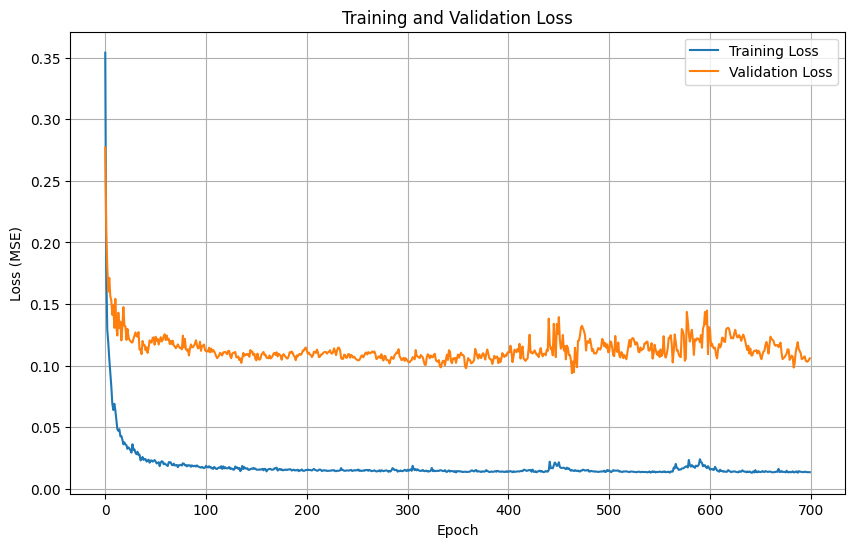

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Plot the distribution of errors (residuals)

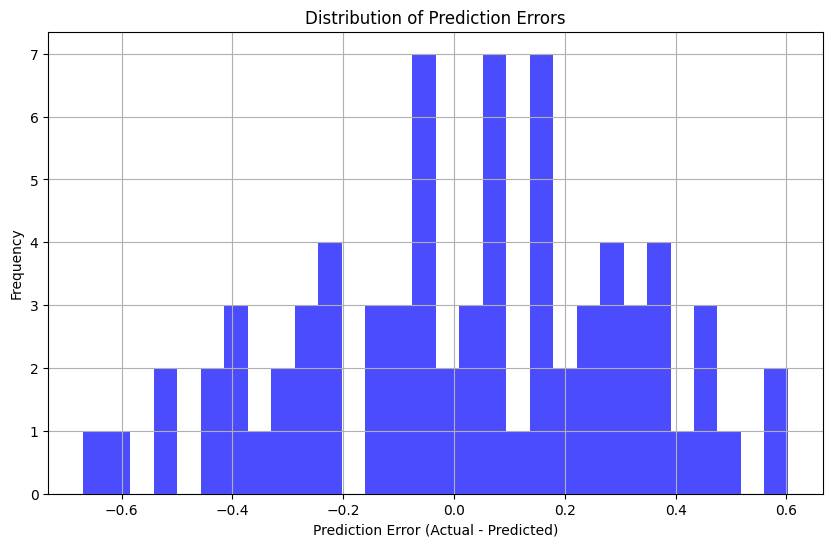

In [46]:
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='blue')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()